# Deep learning with fast.ai cookbook - MNIST "hello world" example
Minimal example using the MNIST dataset to demonstrate a minimimal, "hello world" type fast.ai application.

Here are the built-in choices for MNIST:
- MNIST_SAMPLE        = f'{URL}mnist_sample.tgz' # 3s and 7s only
- MNIST_TINY          = f'{URL}mnist_tiny.tgz' # 3s and 7s only
- MNIST_VAR_SIZE_TINY = f'{S3_IMAGE}mnist_var_size_tiny.tgz' #3s and 7s only
- MNIST               = f'{S3_IMAGE}mnist_png.tgz'

Here is the directory structure for these datasets:

mnist_png:
testing  training

mnist_sample:
labels.csv  train  valid

mnist_tiny:
labels.csv  models  test  train  valid

mnist_var_size_tiny:
labels.csv  models  process.txt  test  train  valid

We are going to use MNIST for this example

In [1]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *


     |████████████████████████████████| 727kB 13.0MB/s 
     |████████████████████████████████| 194kB 49.1MB/s 
     |████████████████████████████████| 1.1MB 44.6MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 


In [2]:
# set up the notebook for fast.ai
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
# In Gradient, datasets get saved in /storage/data when untar_data is called 
# if the dataset has not been copied there already
path = untar_data(URLs.MNIST)

In [5]:
# examine the directory structure of the dataset
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [6]:
# create an image dataloaders object using the path
# note that because of the directory structure of the dataset 
# the train and valid sets have to be explicitly specified
# details here: https://github.com/fastai/fastai/issues/1129
dls = ImageDataLoaders.from_folder(path, train='training', 
                                   valid='testing')
# create a learner object using the dataloaders that was just defined
# architecture is resnet18; see https://pytorch.org/hub/pytorch_vision_resnet/
# loss function is selected for multi class classification
# accuracy is the metric used to optimize
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)
# fit the model for one epoch using 1cycle policy
# see https://docs.fast.ai/callback.schedule.html#Learner.fit_one_cycle
learn.fit_one_cycle(1, 0.1)



epoch,train_loss,valid_loss,accuracy,time
0,0.559660,0.527220,0.990300,01:29


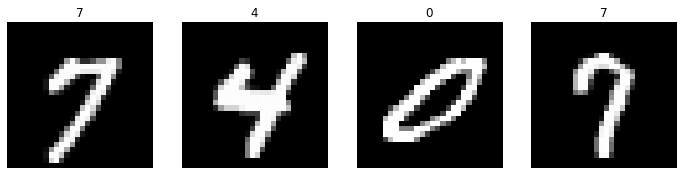

In [ ]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


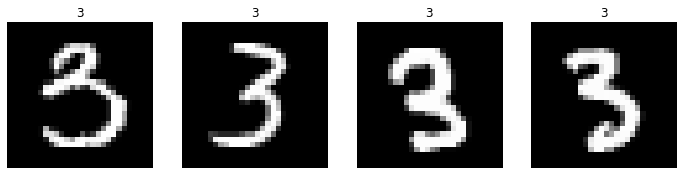

In [ ]:
# show a batch of validation data
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
# take a look at one of the test images
img_files = get_image_files(path/"testing")
img = PILImage.create(img_files[7000])
img


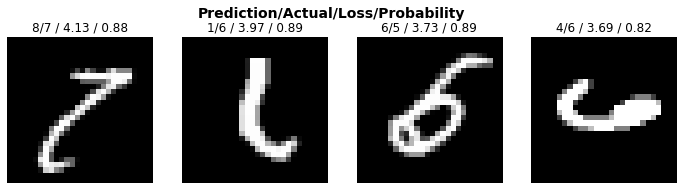

In [ ]:
# show the images with the highest loss
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, nrows=1)


In [ ]:
# examine the model, including its layers
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 14 x 14   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      

In [ ]:
# select an image from the test set
img = PILImage.create(img_files[0])
img

In [ ]:
# apply the trained model to the image
learn.predict(img)

('3',
 tensor(3),
 tensor([0.0091, 0.0079, 0.0093, 0.9207, 0.0075, 0.0122, 0.0076, 0.0089, 0.0060, 0.0108]))

In [ ]:
# select a different test set image and apply the model to it to get a prediction
img = PILImage.create(img_files[2030])
img

In [ ]:
learn.predict(img)

('1',
 tensor(1),
 tensor([0.0106, 0.9124, 0.0093, 0.0093, 0.0092, 0.0099, 0.0109, 0.0088, 0.0092, 0.0104]))

In [ ]:
# select a different image and apply the model to it to get a prediction
img = PILImage.create(img_files[5800])
img

In [ ]:
learn.predict(img)

('2',
 tensor(2),
 tensor([0.0113, 0.0174, 0.8727, 0.0175, 0.0158, 0.0125, 0.0145, 0.0199, 0.0086, 0.0098]))